In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import numpy as np

import tensorflow as tf

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Read the file we are going to use

diabetes_df = pd.read_csv("/content/diabetes_risk_prediction_dataset.csv")
diabetes_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
# Change the name of "class" to "Diabetic"
# This is the column that shows a positive or negative diagnosis for diabetes

diabetes_df.rename(columns = {"class": "Diabetes"}, inplace = True)
diabetes_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


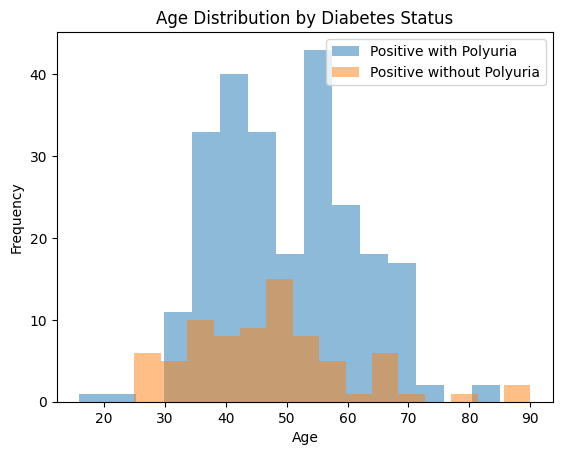

In [4]:
# @title Age Distribution by Diabetes Status - Polyuria

import matplotlib.pyplot as plt

# Create histograms of age for each diabetes status
plt.hist(diabetes_df[(diabetes_df['Diabetes'] == 'Positive') & (diabetes_df['Polyuria'] == 'Yes')]['Age'], bins = 15, alpha=0.5, label='Positive with Polyuria')
plt.hist(diabetes_df[(diabetes_df['Diabetes'] == 'Positive') & (diabetes_df['Polyuria'] == 'No')]['Age'], bins = 15, alpha=0.5, label='Positive without Polyuria')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Diabetes Status')
_ = plt.legend()
#plt.style.use('dark_background')
plt.savefig('Polyuria')



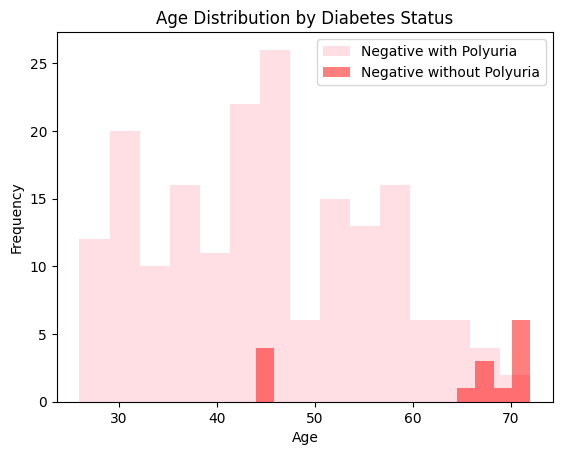

In [5]:
# @title Age Distribution by Diabetes Status - Negative Polyuria

import matplotlib.pyplot as plt

# Create histograms of age for each diabetes status
plt.hist(diabetes_df[(diabetes_df['Diabetes'] == 'Negative') & (diabetes_df['Polyuria'] == 'No')]['Age'], bins = 15, alpha=0.5, color = "pink", label='Negative with Polyuria')
plt.hist(diabetes_df[(diabetes_df['Diabetes'] == 'Negative') & (diabetes_df['Polyuria'] == 'Yes')]['Age'], bins = 15, alpha=0.5, color = "red", label='Negative without Polyuria')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Diabetes Status')
_ = plt.legend()
#plt.style.use('dark_background')
plt.savefig('Negative_Polyuria')


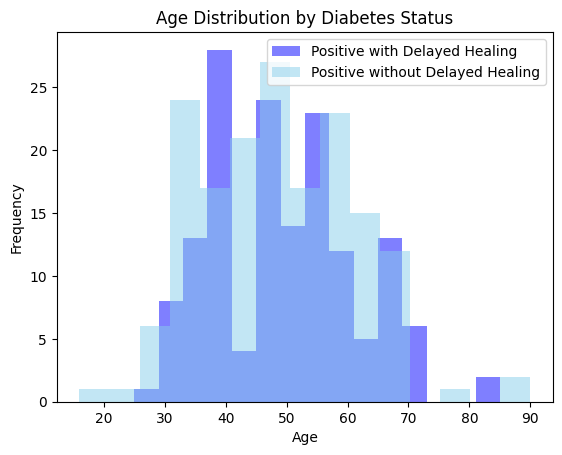

In [6]:
# @title Age Distribution by Diabetes Status - Polydipsia

import matplotlib.pyplot as plt

# Create histograms of age for each diabetes status
plt.hist(diabetes_df[(diabetes_df['Diabetes'] == 'Positive') & (diabetes_df['delayed healing'] == 'Yes')]['Age'], bins = 15, alpha=0.5, color = 'blue', label='Positive with Delayed Healing')
plt.hist(diabetes_df[(diabetes_df['Diabetes'] == 'Positive') & (diabetes_df['delayed healing'] == 'No')]['Age'], bins = 15, alpha=0.5, color = 'skyblue', label='Positive without Delayed Healing')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Diabetes Status')
_ = plt.legend()
#plt.style.use('dark_background')
plt.savefig('Delayed_Healing')

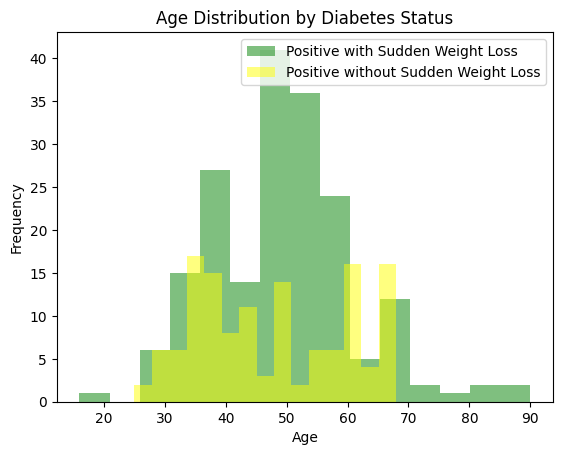

In [7]:
# @title Age Distribution by Diabetes Status - Sudden Weight Loss

import matplotlib.pyplot as plt

# Create histograms of age for each diabetes status
plt.hist(diabetes_df[(diabetes_df['Diabetes'] == 'Positive') & (diabetes_df['sudden weight loss'] == 'Yes')]['Age'], bins = 15, alpha=0.5, color = 'green', label='Positive with Sudden Weight Loss')
plt.hist(diabetes_df[(diabetes_df['Diabetes'] == 'Positive') & (diabetes_df['sudden weight loss'] == 'No')]['Age'], bins = 15, alpha=0.5, color = 'yellow', label='Positive without Sudden Weight Loss')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Diabetes Status')
_ = plt.legend()
#plt.style.use('dark_background')
plt.savefig('Sudden_Weight_Loss')



In [8]:
# Separate the Features (X) from the target (y)
# The result (y) is the outcome of the features
# The rest of the columns besides the result will be the features (X)

y = diabetes_df["Diabetes"]

X = diabetes_df.drop(columns = "Diabetes")

In [9]:
# Convert the features of the categorical variables into booleans

diabetes_dummy_df = pd.get_dummies(X, drop_first = True)

diabetes_dummy_df

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,False,True,True,True,False,True,False,False,True,False,True,True,False,False,False
516,48,False,True,True,True,True,True,False,False,True,True,True,True,False,False,False
517,58,False,True,True,True,True,True,False,True,False,False,False,True,True,False,True
518,32,False,False,False,False,True,False,False,True,True,False,True,False,False,True,False


In [10]:
# Change the name of each column

diabetes_dummy_df = diabetes_dummy_df.rename(columns = {"Polyuria_Yes": "Polyuria",
                                         "Polydipsia_Yes": "Polydipsia",
                                         "sudden weight loss_Yes": "Sudden Weight Loss",
                                         "weakness_Yes": "Weakness",
                                         "Polyphagia_Yes": "Polyphagia",
                                         "Genital thrush_Yes": "Genital Thrush",
                                         "visual blurring_Yes": "Visual Blurring",
                                         "Itching_Yes": "Itching",
                                         "Irritability_Yes": "Irritability",
                                         "delayed healing_Yes": "Delayed Healing",
                                         "partial paresis_Yes": "Partial Paresis",
                                         "muscle stiffness_Yes": "Muscle Stiffness",
                                         "Alopecia_Yes": "Alopecia",
                                         "Obesity_Yes": "Obesity"
})

diabetes_dummy_df

,Age,Gender_Male,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,False,True,True,True,False,True,False,False,True,False,True,True,False,False,False
516,48,False,True,True,True,True,True,False,False,True,True,True,True,False,False,False
517,58,False,True,True,True,True,True,False,True,False,False,False,True,True,False,True
518,32,False,False,False,False,True,False,False,True,True,False,True,False,False,True,False


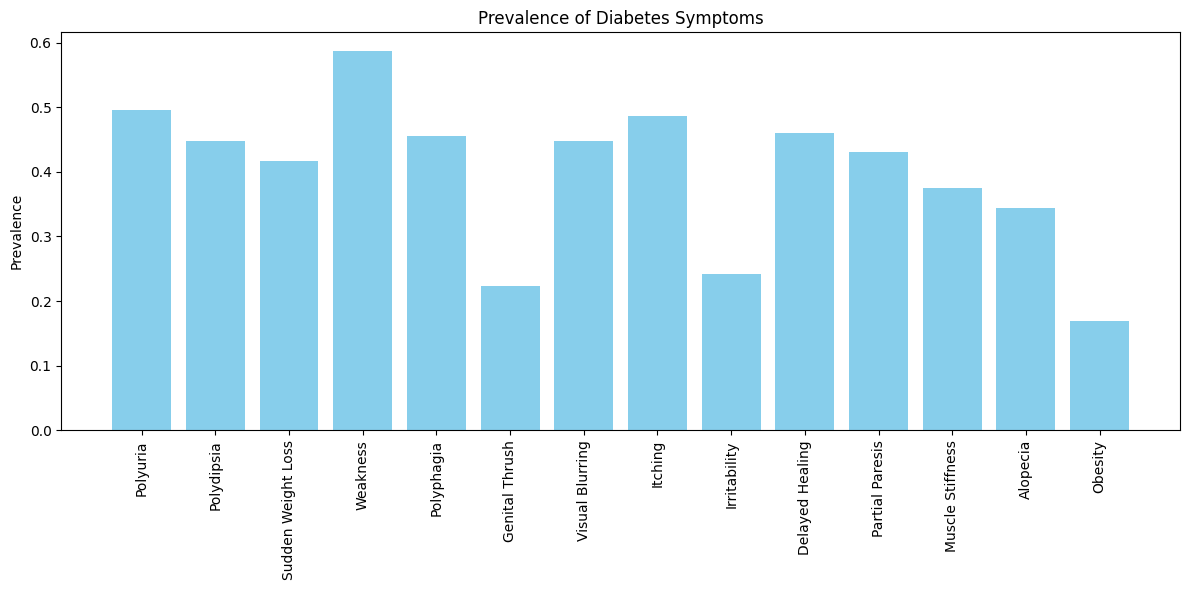

In [11]:
# @title Prevalence of Diabetes Symptoms
# Number of cases of disease or number of people that are reporting a certain symptoms caused by the condition

import matplotlib.pyplot as plt
import numpy as np

symptoms = ['Polyuria', 'Polydipsia', 'Sudden Weight Loss', 'Weakness', 'Polyphagia', 'Genital Thrush', 'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing', 'Partial Paresis', 'Muscle Stiffness', 'Alopecia', 'Obesity']
prevalence = [diabetes_dummy_df[s].mean() for s in symptoms]

plt.figure(figsize=(12, 6))
plt.bar(symptoms, prevalence, color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Prevalence')
plt.title('Prevalence of Diabetes Symptoms')
_ = plt.tight_layout()
#plt.style.use('dark_background')

plt.savefig('Prevalence_Diabetes_Symptoms')

In [12]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(diabetes_dummy_df, y)

# **Logistic Regression**

In [13]:
# Create a Logisitic Regression Model

classifier = LogisticRegression()

# Fit (train) or model using the training data
# dibetes_dummy_df needs to be used as the X since the gender has been converted to represent one column and as a boolean

classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# Score the model using the test data

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9282051282051282
Testing Data Score: 0.9461538461538461


In [15]:
# Make predictions

predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop = True)

results.to_csv('Logistic_Regression_Prediction_vs_Actual.csv', index  = False)

results

,Prediction,Actual
0,Negative,Negative
1,Positive,Positive
2,Negative,Negative
3,Positive,Positive
4,Positive,Positive
...,...,...
125,Negative,Negative
126,Negative,Negative
127,Positive,Positive
128,Positive,Positive


In [16]:
# Calculate the accuracy score

# Display the accuracy score for the test dataset

accuracy_score(y_test, predictions)

0.9461538461538461

In [17]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

# Save to a text file

with open('Classification_Report_1', 'w') as f:
    f.write(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.94      0.93      0.93        54
    Positive       0.95      0.96      0.95        76

    accuracy                           0.95       130
   macro avg       0.95      0.94      0.94       130
weighted avg       0.95      0.95      0.95       130



[[50  4]
 [ 3 73]]


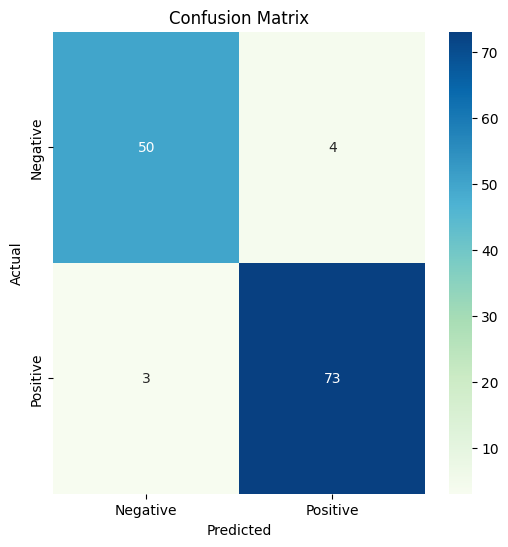

<Figure size 640x480 with 0 Axes>

In [18]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print(cm)

# Convert the confusion matrix to a dataframe

cm_df = pd.DataFrame(
    cm, index = ["Negative", "Positive"],
    columns = ["Negative", "Positive"]
)

# Create a heatmap for the confusion matrix

import seaborn as sns

plt.figure(figsize = (6, 6))
sns.heatmap(cm_df, annot = True, fmt = 'd', cmap = 'GnBu', cbar = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.style.use('dark_background')
plt.show()

plt.savefig('Confusion_Matrix')


# **Neural Network**

In [25]:
# Convert the dummy dataframe from categorical data to numeric

numerical_dummy_df = pd.get_dummies(diabetes_df, drop_first = True, dtype = int)
numerical_dummy_df

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,Diabetes_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [26]:
# Change the name of each column

numerical_dummy_df = numerical_dummy_df.rename(columns = {"Polyuria_Yes": "Polyuria",
                                         "Polydipsia_Yes": "Polydipsia",
                                         "sudden weight loss_Yes": "Sudden Weight Loss",
                                         "weakness_Yes": "Weakness",
                                         "Polyphagia_Yes": "Polyphagia",
                                         "Genital thrush_Yes": "Genital Thrush",
                                         "visual blurring_Yes": "Visual Blurring",
                                         "Itching_Yes": "Itching",
                                         "Irritability_Yes": "Irritability",
                                         "delayed healing_Yes": "Delayed Healing",
                                         "partial paresis_Yes": "Partial Paresis",
                                         "muscle stiffness_Yes": "Muscle Stiffness",
                                         "Alopecia_Yes": "Alopecia",
                                         "Obesity_Yes": "Obesity"
})

numerical_dummy_df

,Age,Gender_Male,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Diabetes_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [27]:
# Split the preprocessed data into our features and target arrays

y = numerical_dummy_df["Diabetes_Positive"]

X = numerical_dummy_df.drop(columns = "Diabetes_Positive")

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instances

scaler = StandardScaler()

# Fit the StandardScaler

X_scaler = scaler.fit(X_train)

# Scale the data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# **Neural Network Optimization Attempt # 1**

In [29]:
# Define the model - deep neural net, the number of input features and hidden nodes for each layer

number_input_features = len(X_train_scaled[0])

d_model_1 = tf.keras.models.Sequential()

# First hidden layer

d_model_1.add(
    tf.keras.layers.Dense(units = 16, input_dim = number_input_features, activation = "relu")
)

# Second hidden layer

d_model_1.add(
    tf.keras.layers.Dense(units = 16, activation = "sigmoid")
)

# Output layer

d_model_1.add(
    tf.keras.layers.Dense(units = 1, activation = "sigmoid")
)

# Check the structure of the model

d_model_1.summary()

# Compile the model

d_model_1.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Train the model

fit_d_model_1 = d_model_1.fit(X_train_scaled, y_train, epochs = 100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6070 - loss: 0.6586
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6274 - loss: 0.6294 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6297 - loss: 0.6008 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - loss: 0.5725 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7223 - loss: 0.5574 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7763 - loss: 0.5437 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8312 - loss: 0.5129 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.4691 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8800 - loss: 0.4630 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8937 - loss: 0.4402 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9174 - loss: 0.4032 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [30]:
# Evaluate the model using the test data

model_loss, model_accuracy = d_model_1.evaluate(X_test_scaled, y_test, verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

model_metrics_1 = pd.DataFrame({
    'Loss': [model_loss],
    'Accuracy': [model_accuracy]
})

model_metrics_1.to_csv('Model_Metrics_1.csv', index = False)

# Save the model results as json file

with open('Diabetes_NN_Model_1.json', 'w') as f:
  f.write(d_model_1.to_json())


5/5 - 0s - 31ms/step - accuracy: 0.9538 - loss: 0.0973
Loss: 0.09734952449798584, Accuracy: 0.9538461565971375


# **Neural Network Optimization Attempt # 2**

In [31]:
# Define the second model - deep neural net, the number of input features and hidden nodes for each layer

number_input_features = len(X_train_scaled[0])

d_model_2 = tf.keras.models.Sequential()

# First hidden layer

d_model_2.add(
    tf.keras.layers.Dense(units = 30, input_dim = number_input_features, activation = "relu")
)

# Second hidden layer

d_model_2.add(
    tf.keras.layers.Dense(units = 20, activation = "sigmoid")
)

# Third hidden layer

d_model_2.add(
    tf.keras.layers.Dense(units = 10, activation = "elu")
)

# Output layer

d_model_2.add(
    tf.keras.layers.Dense(units = 1, activation = "sigmoid")
)

# Check the structure of the model

d_model_2.summary()

# Compile the model

d_model_2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Train the model

fit_d_model_2 = d_model_2.fit(X_train_scaled, y_train, epochs = 100)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,351 (5.28 KB)

 Trainable params: 1,351 (5.28 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5161 - loss: 0.7009
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5984 - loss: 0.6638 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6126 - loss: 0.6315 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6335 - loss: 0.5980 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6725 - loss: 0.5505 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7698 - loss: 0.5132 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8471 - loss: 0.4476 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8665 - loss: 0.4165  
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8941 - loss: 0.3639 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9169 - loss: 0.3114 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9207 - loss: 0.2864 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [32]:
# Evaluate the model using the test data

model_loss, model_accuracy = d_model_2.evaluate(X_test_scaled, y_test, verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

model_metrics_2 = pd.DataFrame({
    'Loss': [model_loss],
    'Accuracy': [model_accuracy]
})

model_metrics_2.to_csv('Model_Metrics_2.csv', index = False)

# Save the model results as json file

with open('Diabetes_NN_Model_2.json', 'w') as f:
  f.write(d_model_2.to_json())

5/5 - 0s - 33ms/step - accuracy: 0.9615 - loss: 0.1139
Loss: 0.11387422680854797, Accuracy: 0.9615384340286255


# **Neural Network Optimization Attempt # 3**

In [33]:
# Define the third model - deep neural net, the number of input features and hidden nodes for each layer

number_input_features = len(X_train_scaled[0])

d_model_3 = tf.keras.models.Sequential()

# First hidden layer

d_model_3.add(
    tf.keras.layers.Dense(units = 25, input_dim = number_input_features, activation = "relu")
)

# Second hidden layer

d_model_3.add(
    tf.keras.layers.Dense(units = 25, activation = "relu")
)

# Third hidden layer

d_model_3.add(
    tf.keras.layers.Dense(units = 25, activation = "elu")
)

# Output layer

d_model_3.add(
    tf.keras.layers.Dense(units = 1, activation = "sigmoid")
)

# Check the structure of the model

d_model_3.summary()

# Compile the model

d_model_3.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Train the model

fit_d_model_3 = d_model_3.fit(X_train_scaled, y_train, epochs = 100)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 25)                  │             425 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,751 (6.84 KB)

 Trainable params: 1,751 (6.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3618 - loss: 0.9357
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5664 - loss: 0.6796 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7613 - loss: 0.5336 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 0.4763 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7803 - loss: 0.4185 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8437 - loss: 0.3399 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.2923 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8513 - loss: 0.2832 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8747 - loss: 0.2631 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9384 - loss: 0.2220 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9135 - loss: 0.2299 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [34]:
# Evaluate the model using the test data

model_loss, model_accuracy = d_model_3.evaluate(X_test_scaled, y_test, verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

model_metrics_3 = pd.DataFrame({
    'Loss': [model_loss],
    'Accuracy': [model_accuracy]
})

model_metrics_3.to_csv('Model_Metrics_3.csv', index = False)

# Save the model results as json file

with open('Diabetes_NN_Model_3.json', 'w') as f:
  f.write(d_model_3.to_json())

5/5 - 1s - 195ms/step - accuracy: 0.9769 - loss: 0.0573
Loss: 0.057314466685056686, Accuracy: 0.9769230484962463
